In [2]:
#bibliotecas
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Configurar estilo dos gráficos
sns.set_theme(style="whitegrid", palette="pastel")

In [4]:
# 2. Carregar e unificar os dados
caminho_raw = '../data/raw/'
anos = ['2020', '2021', '2022', '2023', '2024', '2025']
dataframes = []

for ano in anos:
    arquivo = f'lattes_{ano}.csv'
    caminho_completo = os.path.join(caminho_raw, arquivo)
    
    if os.path.exists(caminho_completo):
        print(f"Carregando {arquivo}...")
        # Lattes costuma usar 'utf-8' ou 'latin1'. O separador é '\t' (Tab)
        df_ano = pd.read_csv(caminho_completo, sep='\t', encoding='utf-16') 
        dataframes.append(df_ano)
    else:
        print(f"Arquivo {arquivo} não encontrado no diretório local.")

# Se não encontrou arquivos, não quebra o código
if dataframes:
    df_completo = pd.concat(dataframes, ignore_index=True)

    # Limpar a última coluna vazia que costuma vir no final do arquivo (Unnamed)
    df_completo = df_completo.loc[:, ~df_completo.columns.str.contains('^Unnamed')]

Carregando lattes_2020.csv...
Carregando lattes_2021.csv...
Carregando lattes_2022.csv...
Carregando lattes_2023.csv...
Carregando lattes_2024.csv...
Carregando lattes_2025.csv...


In [5]:
# 3. Filtrar SOMENTE mulheres
df_mulheres = df_completo[df_completo['.Sexo'] == 'Feminino']

print(f"\nTotal de registros na base original: {len(df_completo)}")
print(f"Total de registros de mulheres: {len(df_mulheres)}")


Total de registros na base original: 415920
Total de registros de mulheres: 231238


In [6]:
# 4. Salvar os dados processados para facilitar o uso depois
os.makedirs('../data/processed/', exist_ok=True)
df_mulheres.to_csv('../data/processed/dados_mulheres_lattes.csv', index=False, sep='\t')
print("\nDados das mulheres salvos com sucesso na pasta processed!")


Dados das mulheres salvos com sucesso na pasta processed!


C:\Users\jamil\AppData\Local\Temp\ipykernel_10116\3680850147.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=areas_formacao.values, y=areas_formacao.index, palette="mako")


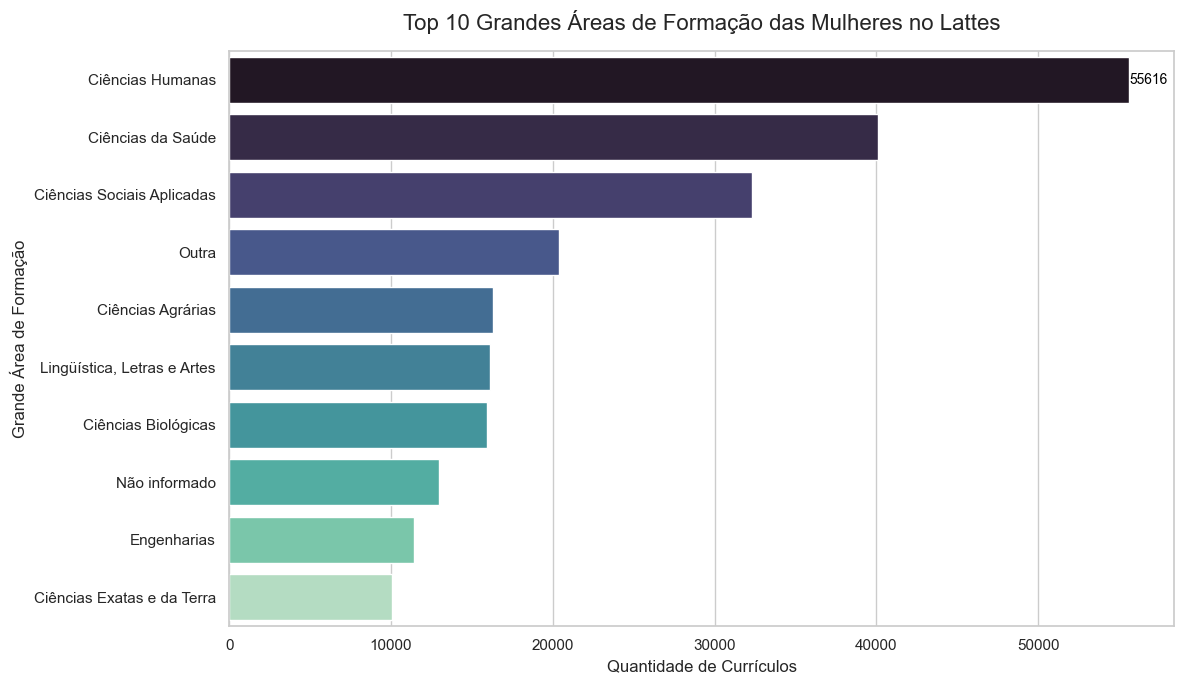

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [7]:
# 5. Primeira Análise Visual: Em quais áreas essas mulheres se formam?
plt.figure(figsize=(12, 7))
# Contar as áreas de formação e pegar as 10 principais
areas_formacao = df_mulheres['.Grande Área (Formação)'].value_counts().head(10)
    
# Criar o gráfico de barras
ax = sns.barplot(x=areas_formacao.values, y=areas_formacao.index, palette="mako")
    
# Ajustes estéticos
plt.title('Top 10 Grandes Áreas de Formação das Mulheres no Lattes', fontsize=16, pad=15)
plt.xlabel('Quantidade de Currículos', fontsize=12)
plt.ylabel('Grande Área de Formação', fontsize=12)
    
# Adicionar os números no final de cada barra
for i, v in enumerate(areas_formacao.values):
    ax.text(v + 3, i, str(v), color='black', va='center', fontsize=10)
        
    plt.tight_layout()
    plt.show()


C:\Users\jamil\AppData\Local\Temp\ipykernel_10116\3632368548.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\jamil\AppData\Local\Temp\ipykernel_10116\3632368548.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


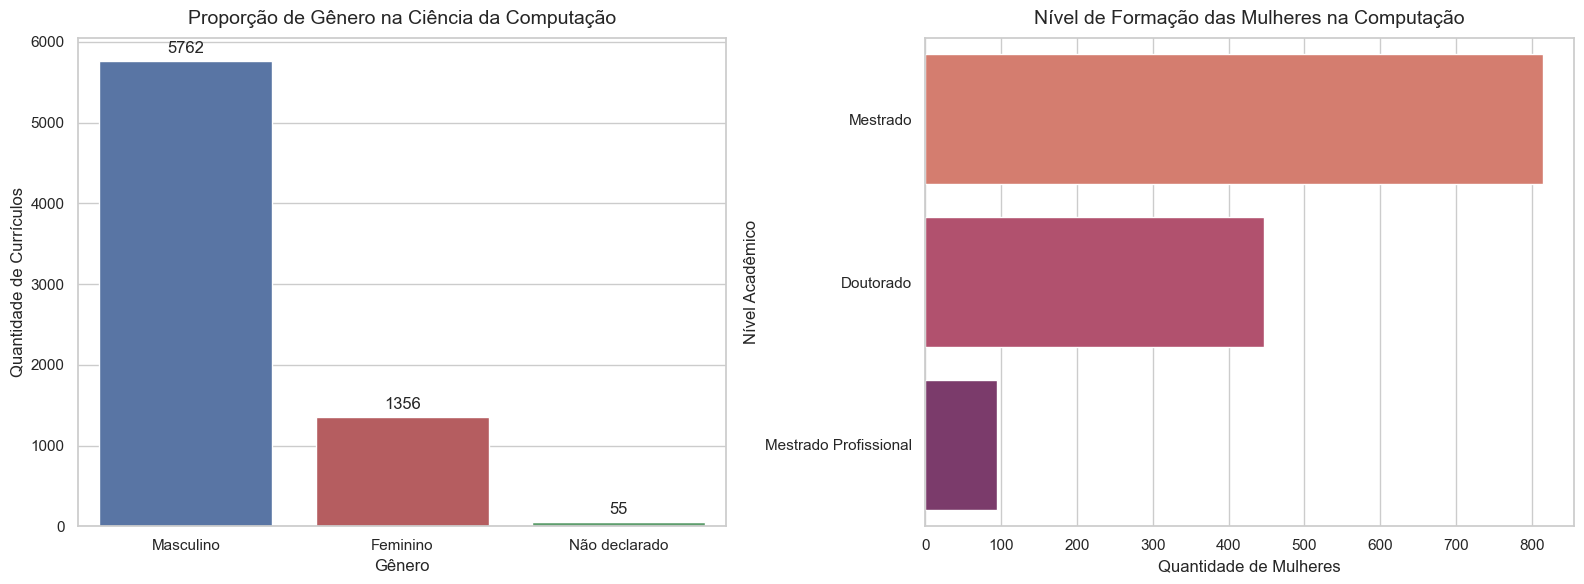

In [8]:
# 6. Filtrar os dados apenas para a área de Ciência da Computação
# Usamos o df_completo (que tem homens e mulheres) para poder comparar
df_cc = df_completo[df_completo['.Área (Formação)'] == 'Ciência da Computação']

# Criar uma figura para colocar 2 gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Gráfico 1: Disparidade de Gênero na Computação ---
sns.countplot(
    data=df_cc, 
    x='.Sexo', 
    ax=axes[0],
    order=df_cc['.Sexo'].value_counts().index, # Ordenar do maior pro menor
    palette=['#4C72B0', '#C44E52', '#55A868'] 
)
axes[0].set_title('Proporção de Gênero na Ciência da Computação', fontsize=14, pad=10)
axes[0].set_xlabel('Gênero', fontsize=12)
axes[0].set_ylabel('Quantidade de Currículos', fontsize=12)

# Adicionar os números exatos em cima das barras para o primeiro gráfico
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), textcoords = 'offset points')

# --- Gráfico 2: Nível de Formação das Mulheres na Computação ---
# Agora filtramos só as mulheres de dentro do grupo de computação
df_cc_mulheres = df_cc[df_cc['.Sexo'] == 'Feminino']

sns.countplot(
    data=df_cc_mulheres, 
    y='.Nível (Formação)', 
    ax=axes[1],
    order=df_cc_mulheres['.Nível (Formação)'].value_counts().index,
    palette="flare" # Uma paleta de cores diferente para destacar
)
axes[1].set_title('Nível de Formação das Mulheres na Computação', fontsize=14, pad=10)
axes[1].set_xlabel('Quantidade de Mulheres', fontsize=12)
axes[1].set_ylabel('Nível Acadêmico', fontsize=12)

# Ajustar o layout para ficar bonito e exibir
plt.tight_layout()
plt.show()

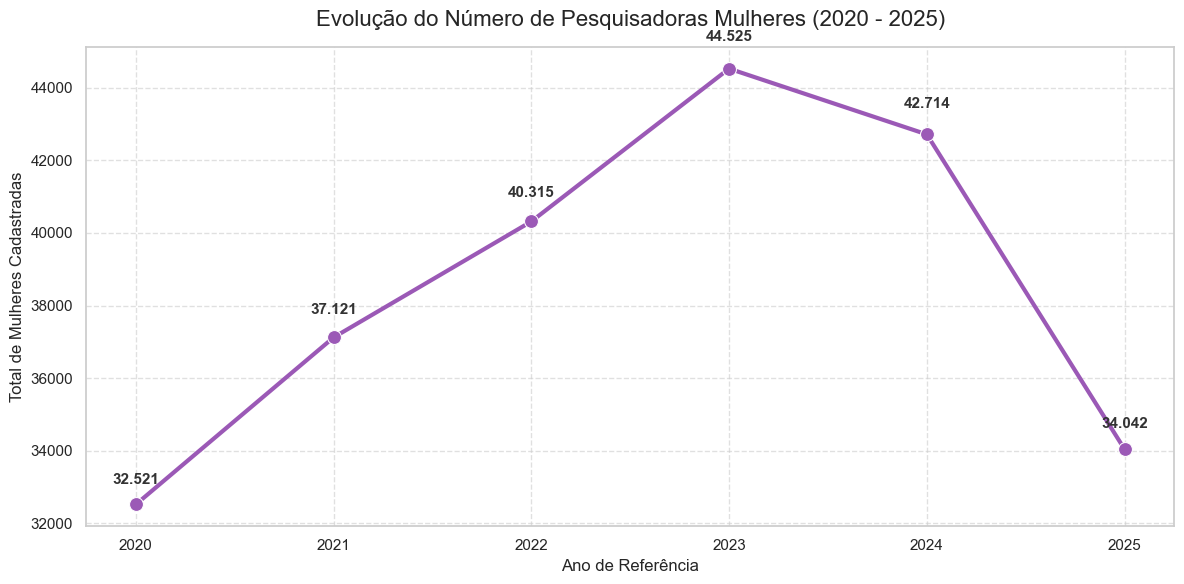

In [9]:
# ANÁLISE DA EVOLUÇÃO TEMPORAL

# 1. Garantir o filtro de mulheres em toda a base
# (Usando o df_completo que carregamos lá no começo)
df_mulheres = df_completo[df_completo['.Sexo'] == 'Feminino']

# 2. Contar a quantidade de currículos de mulheres agrupados por Ano
evolucao_mulheres = df_mulheres['.Ano'].value_counts().sort_index()

# 3. Criar a visualização da evolução (Gráfico de Linha)
plt.figure(figsize=(12, 6))

# Criando o gráfico
ax = sns.lineplot(
    x=evolucao_mulheres.index.astype(str), # Eixo X: Anos (como texto para não ficar com decimais)
    y=evolucao_mulheres.values,            # Eixo Y: Quantidade
    marker='o',                            # Marcador de bolinha nos pontos
    color='#9b59b6',                       # Cor roxa para destacar
    linewidth=3,                           # Espessura da linha
    markersize=10                          # Tamanho da bolinha
)

# 4. Ajustes estéticos e rótulos
plt.title('Evolução do Número de Pesquisadoras Mulheres (2020 - 2025)', fontsize=16, pad=15)
plt.xlabel('Ano de Referência', fontsize=12)
plt.ylabel('Total de Mulheres Cadastradas', fontsize=12)

# 5. Adicionar os números exatos em cima de cada ponto para facilitar a leitura
for x, y in zip(evolucao_mulheres.index.astype(str), evolucao_mulheres.values):
    plt.text(
        x, 
        y + (y * 0.015), # Posição um pouquinho acima do ponto
        f'{y:,.0f}'.replace(',', '.'), # Formata o número com ponto de milhar
        ha='center', 
        va='bottom', 
        fontsize=11, 
        fontweight='bold',
        color='#333333'
    )

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()